In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# učitaj Excel fajl
df = pd.read_excel("../Datasets/online_retail_II.xlsx")



# prikaži prvih 5 redova
df.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [20]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products


Description
WHITE HANGING HEART T-LIGHT HOLDER    57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54698
BROCADE RING PURSE                    47647
PACK OF 72 RETRO SPOT CAKE CASES      46106
ASSORTED COLOUR BIRD ORNAMENT         44925
60 TEATIME FAIRY CAKE CASES           36326
PACK OF 60 PINK PAISLEY CAKE CASES    31822
JUMBO BAG RED RETROSPOT               30727
SMALL POPCORN HOLDER                  29500
STRAWBERRY CERAMIC TRINKET BOX        26563
Name: Quantity, dtype: int64

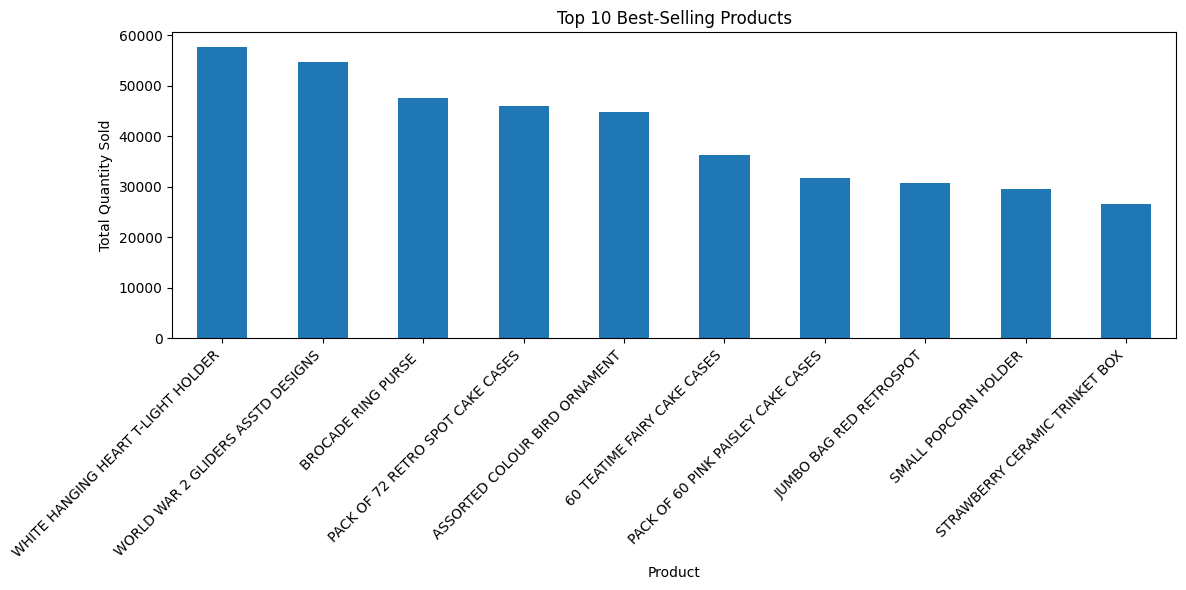

In [21]:
plt.figure(figsize=(12,6))
top_products.plot(kind="bar")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




In [22]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

sales_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
sales_country


Country
United Kingdom    8194777.533
EIRE               352242.730
Netherlands        263863.410
Germany            196290.351
France             130769.900
Sweden              51213.510
Denmark             46972.950
Switzerland         43343.410
Spain               37084.900
Australia           30051.800
Name: TotalPrice, dtype: float64

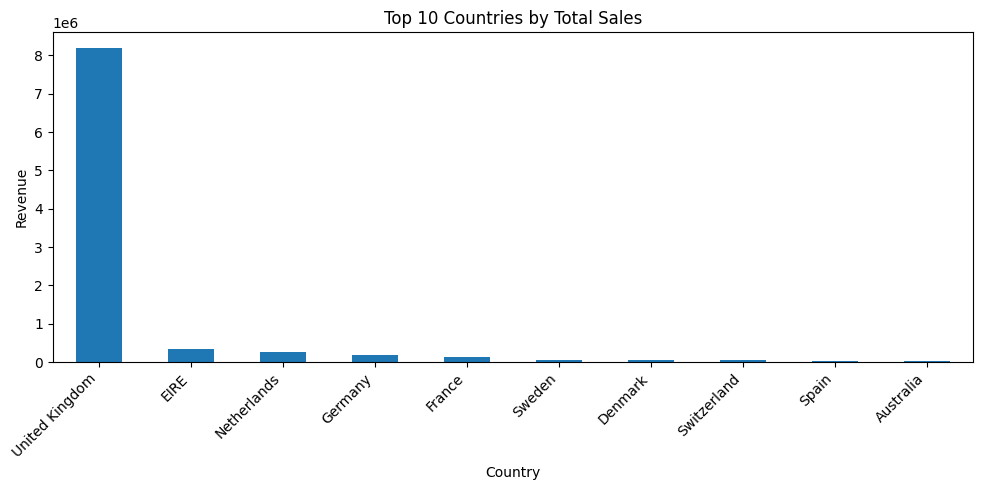

In [23]:
plt.figure(figsize=(10,5))
sales_country.plot(kind="bar")
plt.title("Top 10 Countries by Total Sales")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



In [24]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalPrice"].sum()
monthly_sales


Month
2009-12     799847.110
2010-01     624032.892
2010-02     533091.426
2010-03     765848.761
2010-04     590580.432
2010-05     615322.830
2010-06     679786.610
2010-07     575236.360
2010-08     656776.340
2010-09     853650.431
2010-10    1045168.350
2010-11    1422654.642
2010-12     377488.450
Freq: M, Name: TotalPrice, dtype: float64

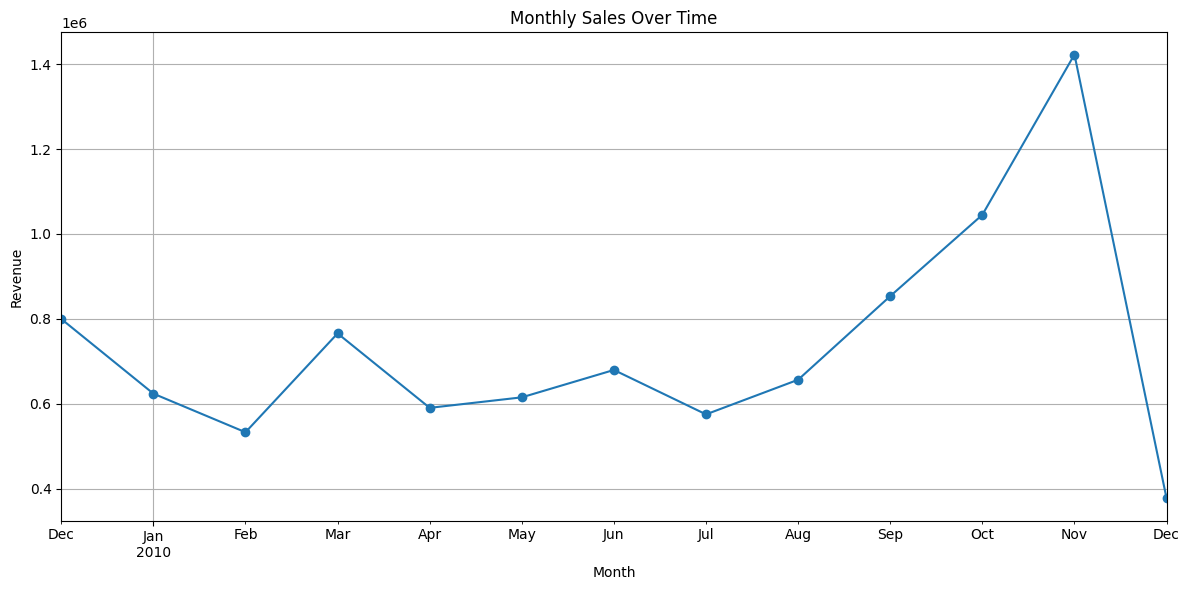

In [25]:
plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
top_revenue_products = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_revenue_products


Description
REGENCY CAKESTAND 3 TIER               163051.46
WHITE HANGING HEART T-LIGHT HOLDER     157865.43
DOTCOM POSTAGE                         116401.99
ASSORTED COLOUR BIRD ORNAMENT           72454.12
PAPER CHAIN KIT 50'S CHRISTMAS          57870.20
JUMBO BAG RED RETROSPOT                 56444.61
PARTY BUNTING                           49645.52
ROTATING SILVER ANGELS T-LIGHT HLDR     47672.49
POSTAGE                                 46092.36
JUMBO BAG STRAWBERRY                    36699.61
Name: TotalPrice, dtype: float64

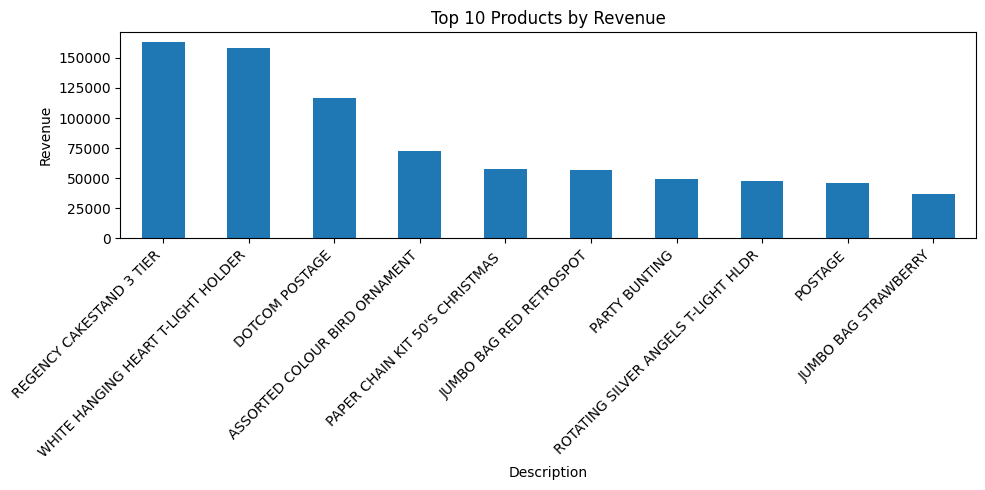

In [27]:
plt.figure(figsize=(10,5))
top_revenue_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



In [28]:
print("""
Summary of Analysis:

1. The best-selling products by revenue are:
   - REGENCY CAKESTAND 3 TIER: $163,051.46
   - WHITE HANGING HEART T-LIGHT HOLDER: $157,865.43
   - DOTCOM POSTAGE: $116,401.99
   - ASSORTED COLOUR BIRD ORNAMENT: $72,454.12
   - PAPER CHAIN KIT 50'S CHRISTMAS: $57,870.20

2. The products with the highest quantities sold are:
   - WHITE HANGING HEART T-LIGHT HOLDER: 57,733 units
   - WORLD WAR 2 GLIDERS ASSTD DESIGNS: 54,698 units
   - BROCADE RING PURSE: 47,647 units
   - PACK OF 72 RETRO SPOT CAKE CASES: 46,106 units
   - ASSORTED COLOUR BIRD ORNAMENT: 44,925 units

3. Monthly sales trend shows:
   - Peak revenue months: November 2010 ($1,422,654.64) and October 2010 ($1,045,168.35)
   - Lowest revenue month: December 2010 ($377,488.45)
   - Overall trend indicates strong seasonal variation with holiday peaks.

4. The most important metric used is TotalPrice = Quantity * Price, which combines both unit sales and revenue to identify top-performing products.
""")



Summary of Analysis:

1. The best-selling products by revenue are:
   - REGENCY CAKESTAND 3 TIER: $163,051.46
   - WHITE HANGING HEART T-LIGHT HOLDER: $157,865.43
   - DOTCOM POSTAGE: $116,401.99
   - ASSORTED COLOUR BIRD ORNAMENT: $72,454.12
   - PAPER CHAIN KIT 50'S CHRISTMAS: $57,870.20

2. The products with the highest quantities sold are:
   - WHITE HANGING HEART T-LIGHT HOLDER: 57,733 units
   - WORLD WAR 2 GLIDERS ASSTD DESIGNS: 54,698 units
   - BROCADE RING PURSE: 47,647 units
   - PACK OF 72 RETRO SPOT CAKE CASES: 46,106 units
   - ASSORTED COLOUR BIRD ORNAMENT: 44,925 units

3. Monthly sales trend shows:
   - Peak revenue months: November 2010 ($1,422,654.64) and October 2010 ($1,045,168.35)
   - Lowest revenue month: December 2010 ($377,488.45)
   - Overall trend indicates strong seasonal variation with holiday peaks.

4. The most important metric used is TotalPrice = Quantity * Price, which combines both unit sales and revenue to identify top-performing products.

